In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

In [17]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img ,text ="ABCDE",org=(50,300) , fontFace=font , fontScale = 5 , color = (255,255,255) , thickness=30)
    return blank_img

In [18]:
img = load_img()

In [19]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap = "gray")

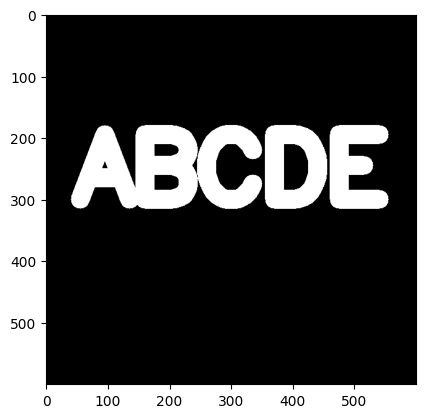

In [22]:
plt.imshow(img,cmap="gray")

In [23]:
kernel = np.ones((5,5) , dtype = np.uint8)

In [24]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [ ]:
erode = cv2.erode(img , kernel , iterations=3) #erozyon işlemi beyaz kısmı (ön plandaki nesne) aşındırır siyahın üstündeki  beyaz lekeleri  yok eder 
                 #Çekirdek, görüntü üzerinde kayar . çekirdeğin altındaki tüm pikseller 1 ise 1 olarak kabul edilir, aksi takdirde aşındırılır (sıfıra dönüştürülür)

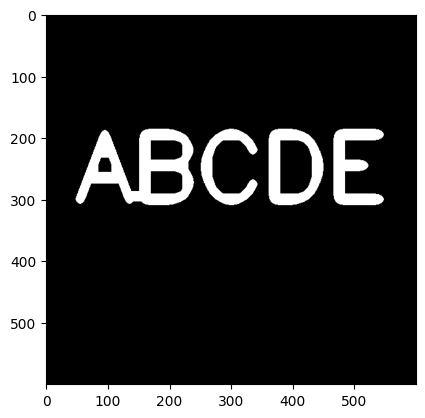

In [28]:
plt.imshow(erode , cmap="gray")

In [ ]:
dilate = cv2.dilate(img , kernel ,iterations=3 ) #erozyonun tersidir , erozyonun tam tersidir.
                                                # Burada, çekirdeğin altındaki en az bir piksel ‘1’ ise, piksel öğesi ‘1’ olur.
                                                #Böylece görüntüdeki beyaz alan artar veya ön plandaki nesnenin boyutu büyür.

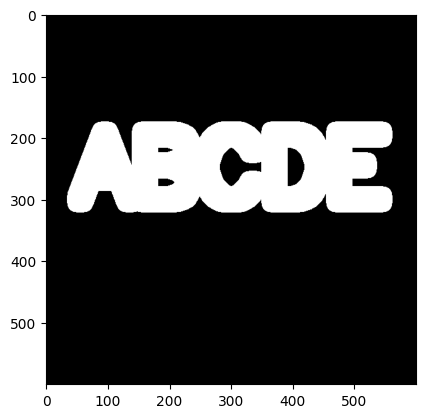

In [31]:
plt.imshow(dilate,cmap="gray")

In [32]:
img = load_img()

In [33]:
white_noisy = np.random.randint(low = 0 , high = 2, size = (600,600))

In [36]:
white_noisy

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

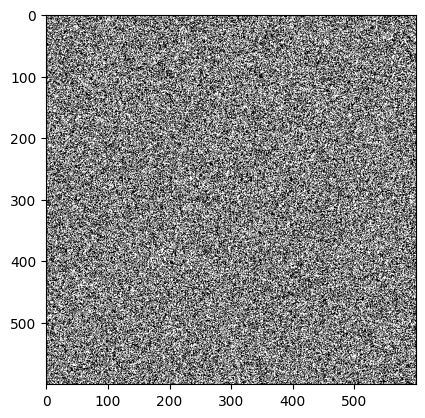

In [35]:
plt.imshow(white_noisy , cmap = "gray")

In [37]:
white_noisy = white_noisy * 255 

In [38]:
white_noisy

array([[255, 255,   0, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [255, 255, 255, ...,   0, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0]])

In [39]:
noisy_img = white_noisy + img

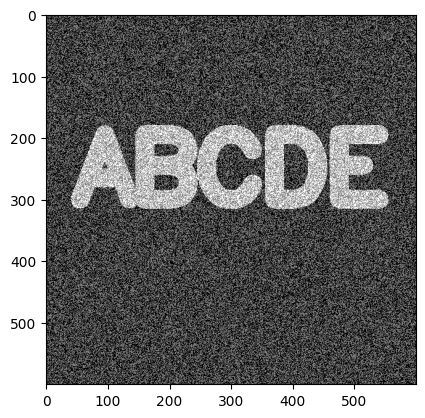

In [40]:
plt.imshow(noisy_img , cmap="gray")

In [42]:
opening = cv2.morphologyEx(noisy_img ,  cv2.MORPH_OPEN , kernel) # erosion -> dilation önce erozyon sonra dilate yapılır 

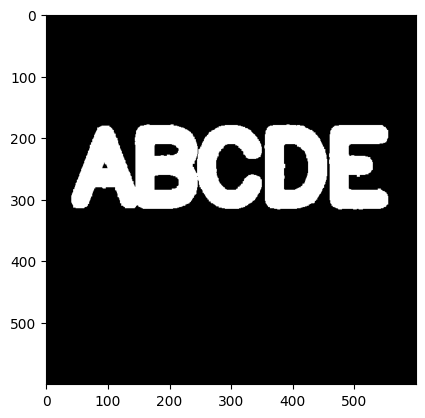

In [44]:
plt.imshow(opening , cmap="gray")

In [45]:
closed = cv2.morphologyEx(noisy_img ,cv2.MORPH_CLOSE , kernel)

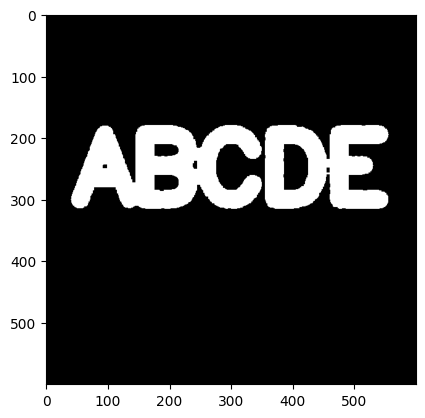

In [46]:
plt.imshow(closed , cmap="gray")

In [47]:
img = load_img()

In [49]:
black_noise = np.random.randint(low = 0 ,high = 2, size = (600,600))

In [50]:
black_noise = black_noise* - 255

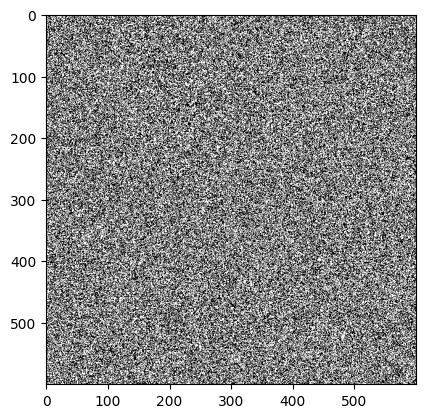

In [52]:
plt.imshow(black_noise , cmap = "gray")

In [53]:
black_noise_img = img + black_noise

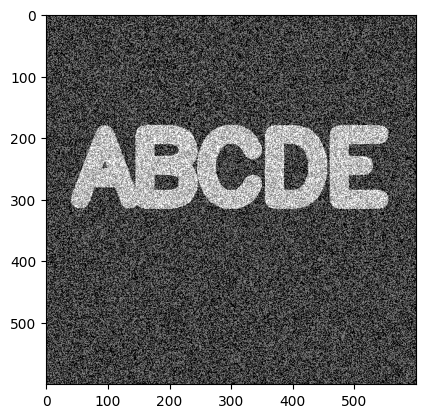

In [54]:
plt.imshow(black_noise_img , cmap="gray")

In [55]:
black_noise_img[black_noise_img == -255] = 0

In [ ]:
black_noise_img.min()

0.0

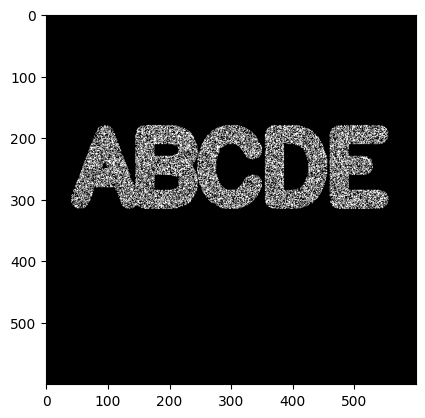

In [58]:
plt.imshow(black_noise_img , cmap="gray")

In [59]:
closed = cv2.morphologyEx(black_noise_img ,cv2.MORPH_CLOSE , kernel)

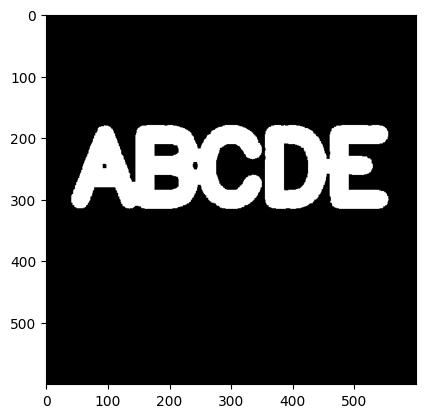

In [60]:
plt.imshow(closed , cmap = "gray")

In [61]:
img = load_img()

In [63]:
grad = cv2.morphologyEx(img ,cv2.MORPH_GRADIENT , kernel)

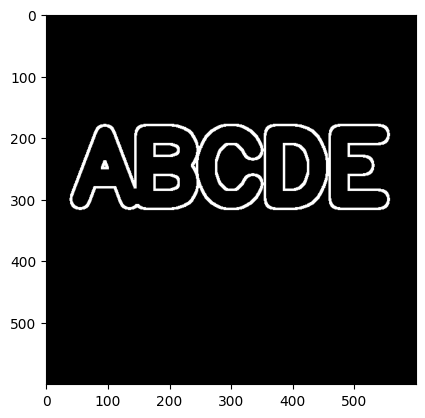

In [ ]:
plt.imshow(grad , cmap="gray")